1. Perform linear regression to predict
a. CO2 Emission Dataset: fuel_consumption_dataset.csv
b. The selling price of a used car. Dataset: used_cars_dataset.csv
Evaluate the quality of the models by computing relevant performance metrics, including the R² value. Generate and display a plot that compares the actual values to the predicted values (Actual vs Predicted) for both tasks.

Here is the combined implementation for both tasks (CO2 Emission and Used Car Selling Price) following the provided steps:

---

### **1. Import Required Libraries**
We import the necessary libraries for data manipulation, visualization, and machine learning.



In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder



---

### **2. Load and Clean the Datasets**

#### a. CO2 Emission Dataset


In [25]:
# Load CO2 Emission dataset
df_co2 = pd.read_csv('fuel_consumption_dataset.csv')

# Replace '?' with pd.NA and drop missing values
df_co2.replace("?", pd.NA, inplace=True)
df_co2.dropna(inplace=True)



#### b. Used Car Dataset


In [26]:
# Load Used Car dataset
df_car = pd.read_csv('used_cars_dataset.csv')

# Replace '?' with pd.NA and drop missing values
df_car.replace("?", pd.NA, inplace=True)
df_car.dropna(inplace=True)



---

### **3. Encode Categorical Columns**

#### a. CO2 Emission Dataset


In [27]:
# Encode categorical columns in CO2 dataset
le = LabelEncoder()
for col in df_co2.select_dtypes(include=['object']).columns:
    df_co2[col] = le.fit_transform(df_co2[col])



#### b. Used Car Dataset


In [28]:
# Encode categorical columns in Used Car dataset
for col in df_car.select_dtypes(include=['object']).columns:
    df_car[col] = le.fit_transform(df_car[col])



---

### **4. Visualize Correlations**

#### a. CO2 Emission Dataset


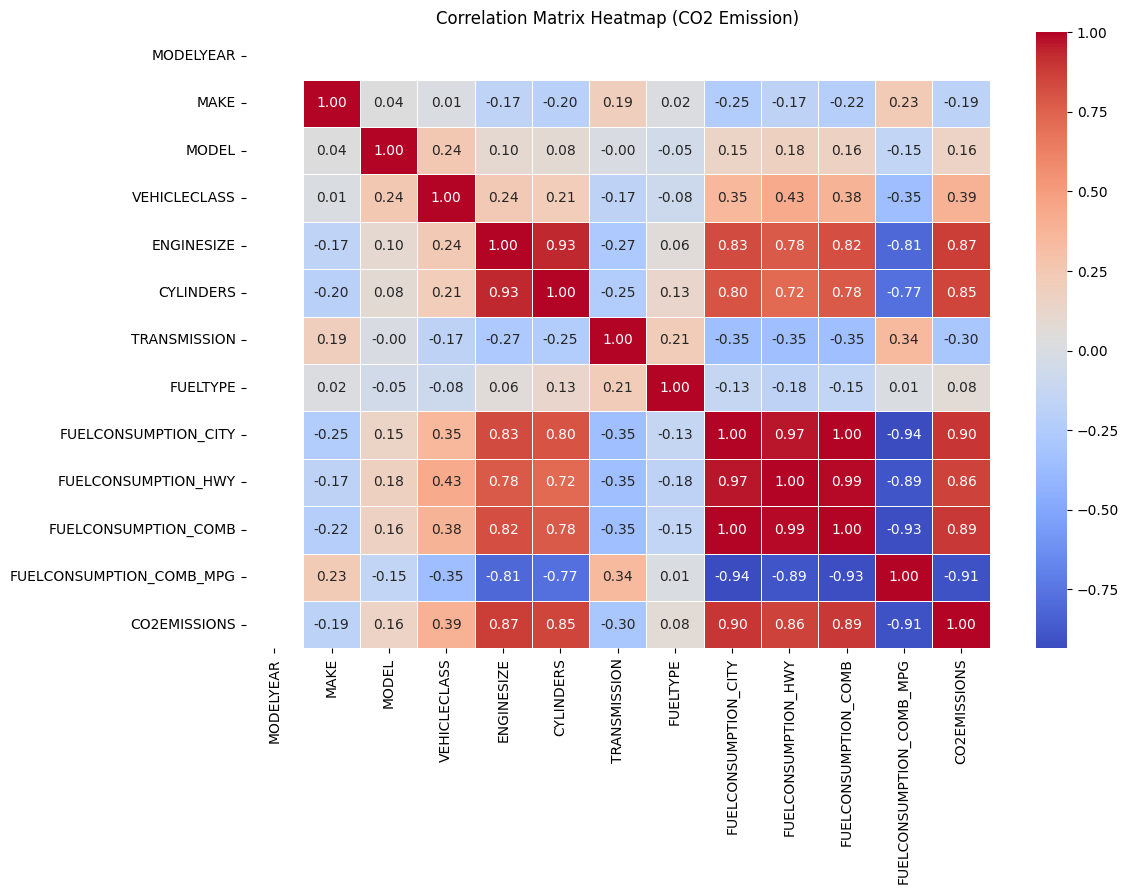

In [29]:
# Correlation heatmap for CO2 dataset
correlation_matrix_co2 = df_co2.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_co2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap (CO2 Emission)")
plt.show()



#### b. Used Car Dataset


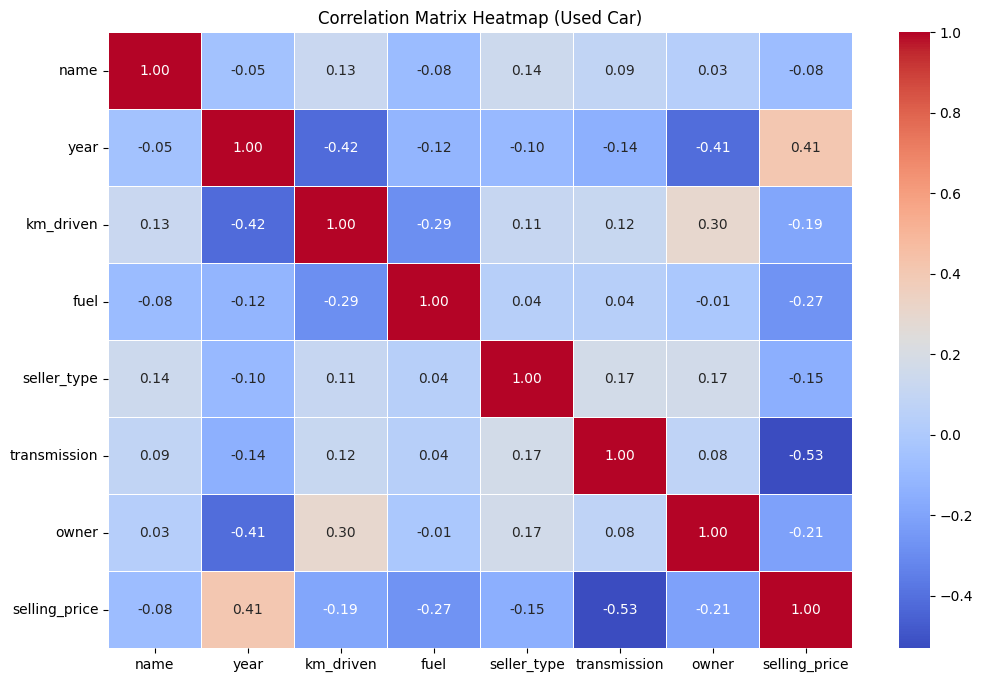

In [30]:
# Correlation heatmap for Used Car dataset
correlation_matrix_car = df_car.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_car, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Used Car)")
plt.show()



---

### **5. Filter Correlations by Threshold**

#### a. CO2 Emission Dataset


In [31]:
# Select highly correlated features for CO2 dataset
threshold = 0.5
correlated_features_co2 = correlation_matrix_co2['CO2EMISSIONS'][correlation_matrix_co2['CO2EMISSIONS'].abs() > threshold].index.tolist()
correlated_features_co2.remove('CO2EMISSIONS')
print(correlated_features_co2)

['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']




#### b. Used Car Dataset


In [32]:
# Select highly correlated features for Used Car dataset
threshold_2 = 0.2

correlated_features_car = correlation_matrix_car['selling_price'][correlation_matrix_car['selling_price'].abs() > threshold_2].index.tolist()
correlated_features_car.remove('selling_price')
print(correlated_features_car)

['year', 'fuel', 'transmission', 'owner']




---

### **6. Prepare Features and Target**

#### a. CO2 Emission Dataset


In [33]:
# Prepare features and target for CO2 dataset
X_co2 = df_co2.iloc[:, :-1]
y_co2 = df_co2.iloc[:, -1]
X_co2_sel = df_co2[correlated_features_co2]



#### b. Used Car Dataset


In [34]:
# Prepare features and target for Used Car dataset
X_car = df_car.iloc[:, :-1]
y_car = df_car.iloc[:, -1]
X_car_sel = df_car[correlated_features_car]



---

### **7. Split Data into Training and Testing Sets**

#### a. CO2 Emission Dataset


In [35]:
# Split CO2 dataset
X_train_co2, X_test_co2, y_train_co2, y_test_co2 = train_test_split(X_co2, y_co2, test_size=0.2, random_state=42)
X_train_co2_sel, X_test_co2_sel, y_train_co2_sel, y_test_co2_sel = train_test_split(X_co2_sel, y_co2, test_size=0.2, random_state=42)



#### b. Used Car Dataset


In [36]:
# Split Used Car dataset
X_train_car, X_test_car, y_train_car, y_test_car = train_test_split(X_car, y_car, test_size=0.2, random_state=42)
X_train_car_sel, X_test_car_sel, y_train_car_sel, y_test_car_sel = train_test_split(X_car_sel, y_car, test_size=0.2, random_state=42)



---

### **8. Train the Linear Regression Models**

#### a. CO2 Emission Dataset


In [37]:
# Train models for CO2 dataset
model_co2_all = LinearRegression()
model_co2_all.fit(X_train_co2, y_train_co2)

model_co2_sel = LinearRegression()
model_co2_sel.fit(X_train_co2_sel, y_train_co2_sel)

LinearRegression()



#### b. Used Car Dataset


In [38]:
# Train models for Used Car dataset
model_car_all = LinearRegression()
model_car_all.fit(X_train_car, y_train_car)

model_car_sel = LinearRegression()
model_car_sel.fit(X_train_car_sel, y_train_car_sel)

LinearRegression()



---

### **9. Make Predictions**

#### a. CO2 Emission Dataset


In [39]:
# Predictions for CO2 dataset
y_pred_co2_all = model_co2_all.predict(X_test_co2)
y_pred_co2_sel = model_co2_sel.predict(X_test_co2_sel)



#### b. Used Car Dataset


In [40]:
# Predictions for Used Car dataset
y_pred_car_all = model_car_all.predict(X_test_car)
y_pred_car_sel = model_car_sel.predict(X_test_car_sel)



---

### **10. Evaluate the Models**

#### a. CO2 Emission Dataset


In [41]:
# Evaluate CO2 models
r2_co2_all = r2_score(y_test_co2, y_pred_co2_all)
mse_co2_all = mean_squared_error(y_test_co2, y_pred_co2_all)

r2_co2_sel = r2_score(y_test_co2_sel, y_pred_co2_sel)
mse_co2_sel = mean_squared_error(y_test_co2_sel, y_pred_co2_sel)

print("CO2 Emission Dataset:")
print(f"All Features - R²: {r2_co2_all:.4f}, MSE: {mse_co2_all:.4f}")
print(f"Selected Features - R²: {r2_co2_sel:.4f}, MSE: {mse_co2_sel:.4f}")

CO2 Emission Dataset:
All Features - R²: 0.9188, MSE: 335.6547
Selected Features - R²: 0.9034, MSE: 399.4187




#### b. Used Car Dataset


In [48]:
# Evaluate Used Car models
r2_car_all = r2_score(y_test_car, y_pred_car_all)
mse_car_all = mean_squared_error(y_test_car, y_pred_car_all)

r2_car_sel = r2_score(y_test_car_sel, y_pred_car_sel)
mse_car_sel = mean_squared_error(y_test_car_sel, y_pred_car_sel)

print("Used Car Dataset:")
print(f"All Features - R²: {r2_car_all:.2f}, MSE: {mse_car_all:.2f}")
print(f"Selected Features - R²: {r2_car_sel:.2f}, MSE: {mse_car_sel:.2f}")

Used Car Dataset:
All Features - R²: 0.40, MSE: 184332080354.49
Selected Features - R²: 0.39, MSE: 185698632870.56




---

### **11. Visualize Actual vs Predicted Values**

#### a. CO2 Emission Dataset


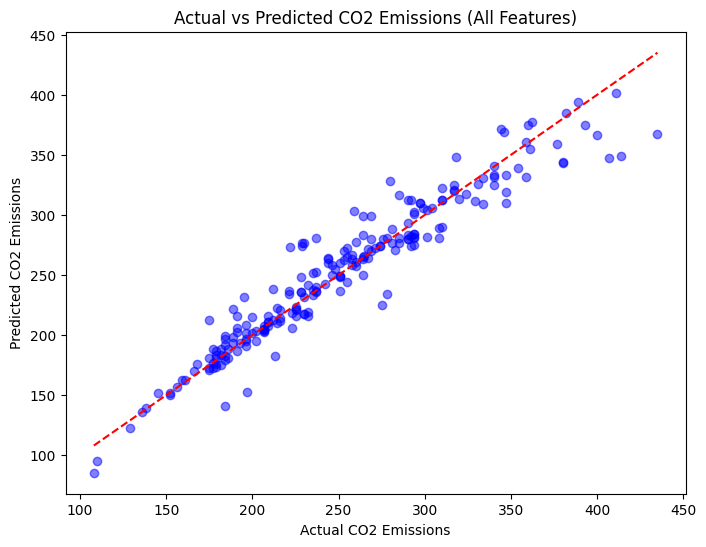

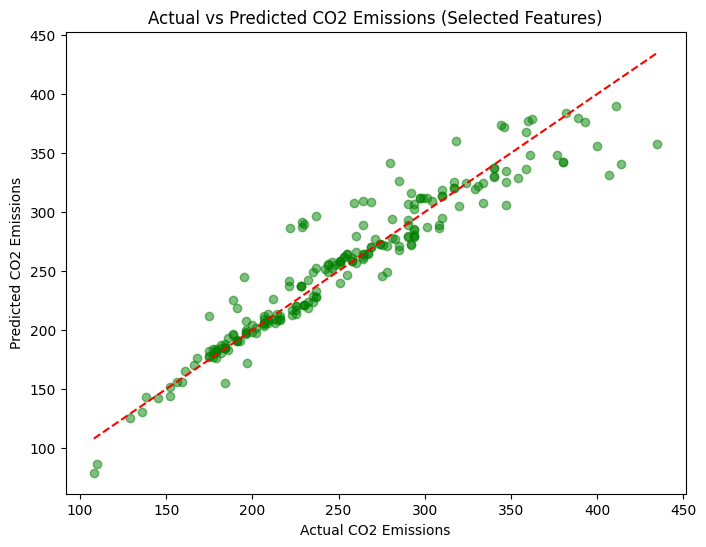

In [43]:
# Plot for CO2 dataset
plt.figure(figsize=(8, 6))
plt.scatter(y_test_co2, y_pred_co2_all, color='blue', alpha=0.5)
plt.plot([y_test_co2.min(), y_test_co2.max()], [y_test_co2.min(), y_test_co2.max()], color='red', linestyle='dashed')
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions (All Features)")
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test_co2_sel, y_pred_co2_sel, color='green', alpha=0.5)
plt.plot([y_test_co2_sel.min(), y_test_co2_sel.max()], [y_test_co2_sel.min(), y_test_co2_sel.max()], color='red', linestyle='dashed')
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions (Selected Features)")
plt.show()



#### b. Used Car Dataset


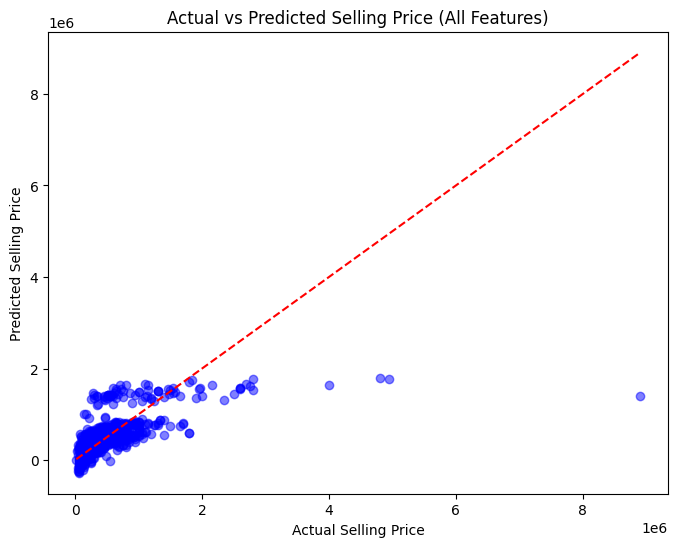

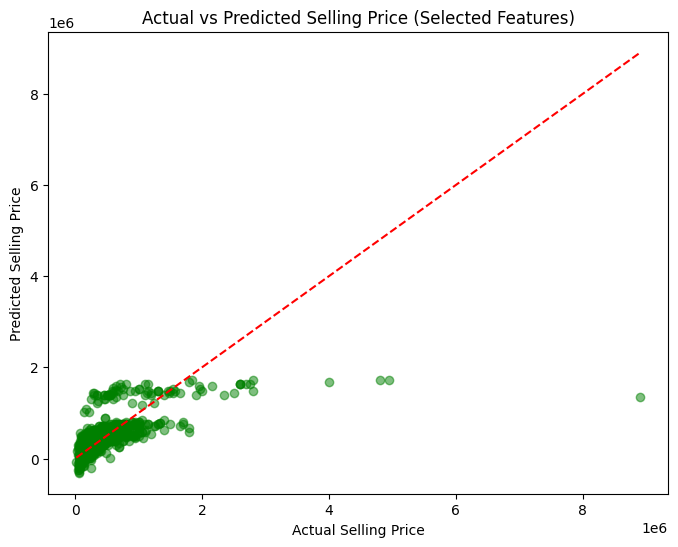

In [44]:
# Plot for Used Car dataset
plt.figure(figsize=(8, 6))
plt.scatter(y_test_car, y_pred_car_all, color='blue', alpha=0.5)
plt.plot([y_test_car.min(), y_test_car.max()], [y_test_car.min(), y_test_car.max()], color='red', linestyle='dashed')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price (All Features)")
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test_car_sel, y_pred_car_sel, color='green', alpha=0.5)
plt.plot([y_test_car_sel.min(), y_test_car_sel.max()], [y_test_car_sel.min(), y_test_car_sel.max()], color='red', linestyle='dashed')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price (Selected Features)")
plt.show()

The **Summary of Steps** is located in the **first markdown cell** of the file. It outlines the steps to perform linear regression for both datasets (CO2 Emission and Used Car Selling Price). Here's the relevant excerpt:

---

### **Summary of Steps**:
1. Import libraries for data manipulation, visualization, and machine learning.  
2. Load and clean the dataset.  
3. Encode categorical columns using `LabelEncoder`.  
4. Visualize correlations and filter features based on a threshold.  
5. Prepare `X_features` and target `y_feature` (last column).  
6. Split the data into training and testing sets.  
7. Train two linear regression models (all features vs. selected features).  
8. Make predictions using the trained models.  
9. Evaluate the models using R² Score and MSE.  
10. Visualize the actual vs predicted selling prices for both models.  

---

This summary is located at the beginning of the notebook, right after the problem description.